In [1]:
# from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.metrics import confusion_matrix
print(tf.__version__)

1.12.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [121]:
train_images.shape
#60000 examples with 28x28 NumPy arrays (each example has 28 cols and 28 rows)

(60000, 28, 28)

In [18]:
#an observation looks like this
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [19]:
train_labels[0]

9

In [20]:
#6000 counts for each number from 0-9
np.bincount(train_labels)

array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

<function matplotlib.pyplot.show(*args, **kw)>

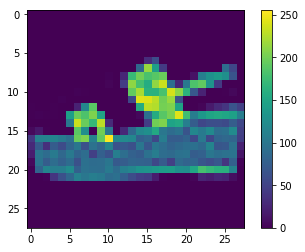

In [7]:
plt.figure()
plt.imshow(train_images[12])
plt.colorbar()
plt.grid(False)
plt.show

In [8]:
#scaling image
train_image = train_images / 255.0
test_image = test_images / 255.0

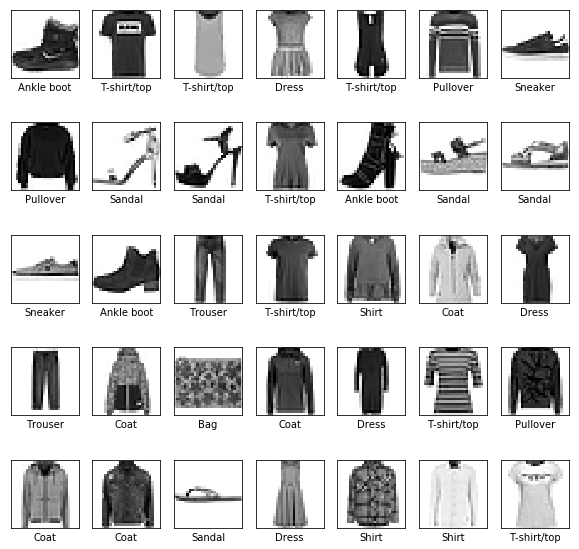

In [21]:
#quick look at the observations
plt.figure(figsize=(10,10))
for i in range(35):
    plt.subplot(5,7,i+1) #5x5 grid, i+1 = index position of each photo
    plt.xticks([]) #remove x ticks
    plt.yticks([]) #remove y ticks
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) #plt.cm = colormap (show image color)
    plt.xlabel(class_names[train_labels[i]]) #label on x bar
plt.show() #show image

In [10]:
#setting layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #convert 2d images to 1d images by 28*28=784 pixels
    keras.layers.Dense(128, activation=tf.nn.relu), #128 nodes
    keras.layers.Dense(10, activation=tf.nn.softmax) #10 nodes, each node contains a score that indicates the prob. that the current image belongs to one of the 10 classes
])

In [12]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_image, train_labels, epochs=5) #use normalized data to train

Epoch 1/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.4992 - acc: 0.8249
Epoch 2/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.3747 - acc: 0.8634
Epoch 3/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.3354 - acc: 0.8776
Epoch 4/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.3098 - acc: 0.8858
Epoch 5/5
60000/60000 [==============================] - 5s 82us/step - loss: 0.2961 - acc: 0.8913


In [13]:
test_loss, test_acc = model.evaluate(test_image, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 45us/step
Test accuracy: 0.8728


In [14]:
predictions = model.predict_classes(test_images)
#predictions = model.predict(test_images) #this returns an array of probabilities for each example
#confusion_matrix(test_label, np.argmax(predictions, axis=1))
#np.argmax(predictions, axis=1) #returns an array of predicted classes of length 10000

In [15]:
#Confusion matrix in array
confusion = confusion_matrix(test_labels, predictions)
confusion

array([[870,  13,  32,  19,   4,   0,  52,   0,  10,   0],
       [  1, 978,   0,  15,   3,   0,   1,   0,   2,   0],
       [ 13,   3, 827,   4, 130,   0,  21,   0,   1,   1],
       [ 24,  37,  26, 826,  64,   1,  17,   0,   4,   1],
       [  1,   2, 127,  17, 841,   0,  10,   0,   2,   0],
       [  0,   0,   0,   0,   0, 919,   0,  30,   1,  50],
       [185,  12, 174,  21, 155,   0, 438,   0,  15,   0],
       [  0,   0,   0,   0,   0,  15,   0, 916,   2,  67],
       [  4,   0,   6,   3,   4,   3,   0,   3, 976,   1],
       [  0,   0,   0,   0,   0,   3,   1,  18,   0, 978]])

In [16]:
#Create a nice table of confusion matrix
y_actu = pd.Series(test_labels, name = 'Actual')
y_pred = pd.Series(predictions, name = 'Pred')
df_confusion = pd.crosstab(y_actu, y_pred, margins=True)
df_confusion

Pred,0,1,2,3,4,5,6,7,8,9,All
Actual,,,,,,,,,,,
0,870,13,32,19,4,0,52,0,10,0,1000
1,1,978,0,15,3,0,1,0,2,0,1000
2,13,3,827,4,130,0,21,0,1,1,1000
3,24,37,26,826,64,1,17,0,4,1,1000
4,1,2,127,17,841,0,10,0,2,0,1000
5,0,0,0,0,0,919,0,30,1,50,1000
6,185,12,174,21,155,0,438,0,15,0,1000
7,0,0,0,0,0,15,0,916,2,67,1000
8,4,0,6,3,4,3,0,3,976,1,1000
